In [1]:
import anndata as ad
import pandas as pd
import numpy as np
import scanpy as sc
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
import seaborn as sns


def getNClusters(adata,n_cluster,range_min=0,range_max=3,max_steps=20):
    this_step = 0
    this_min = float(range_min)
    this_max = float(range_max)
    while this_step < max_steps:
        print('step ' + str(this_step))
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.louvain(adata,resolution=this_resolution)
        this_clusters = adata.obs['louvain'].nunique()
        
        print('got ' + str(this_clusters) + ' at resolution ' + str(this_resolution))
        
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:
            return(this_resolution, adata)
        this_step += 1
    
    print('Cannot find the number of clusters')
    print('Clustering solution from last iteration is used:' + str(this_clusters) + ' at resolution ' + str(this_resolution))
    

/home/icb/anna.danese/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


0.1.6+59.g830cd8d


In [ ]:
DATADIR = ''
result_file = 'processed_all_buenrostro_bulk_peaks.h5ad'


In [ ]:
adata = ad.read(DATADIR+result_file)

In [ ]:
labels_true = adata.obs['label']
labels_pred = adata.obs['louvain']
print(adjusted_rand_score(labels_true, labels_pred))

0.524501380496373
step 0
got 17 at resolution 1.5
step 1
got 10 at resolution 0.75


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

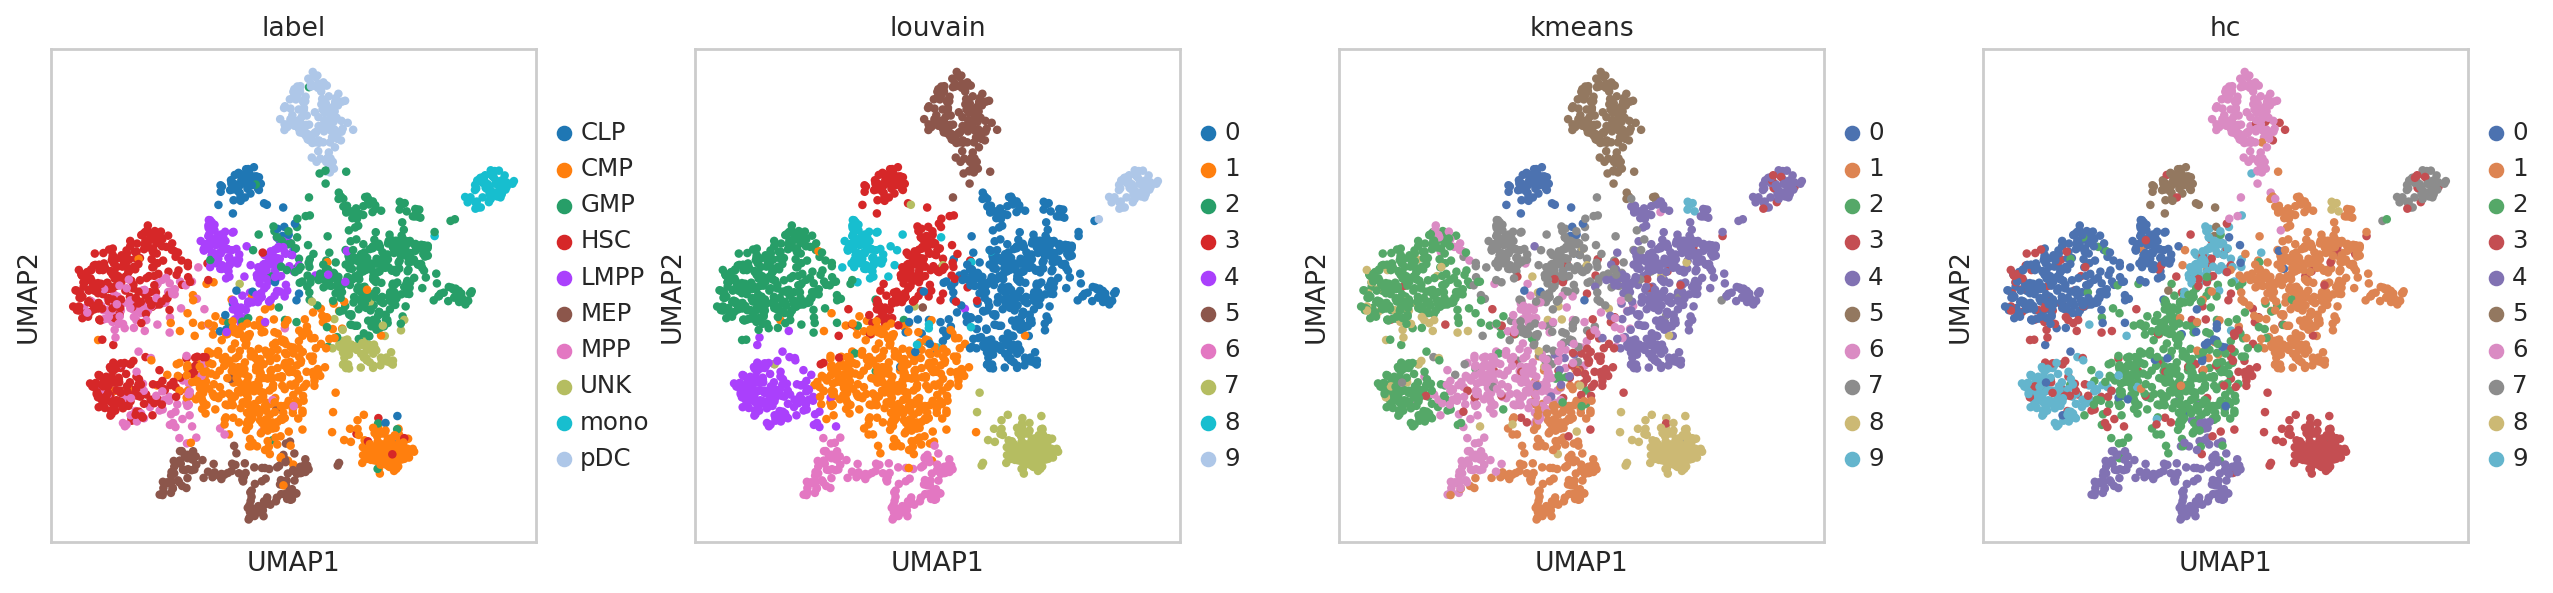

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,method
epiScanpy-adata,0.551535,0.378301,0.415368,0.670434,0.531594,0.539244,0.687667,0.537621,0.541049,epiScanpy-adata
ChromVAR_kmers,0.393487,0.260785,0.225031,0.524566,0.413008,0.356731,0.543092,0.370503,0.301594,ChromVAR_kmers
ChromVAR_motifs,0.319824,0.209636,0.323051,0.510618,0.413654,0.464172,0.534893,0.429699,0.437689,ChromVAR_motifs
cisTopic,0.551506,0.351849,0.383048,0.661205,0.555908,0.573953,0.674538,0.585062,0.597290,cisTopic
Cusanovich2018,0.490138,-0.001942,-0.001942,0.636935,-0.002788,-0.002788,0.635598,0.003022,0.003022,Cusanovich2018
Control,0.183302,0.022970,0.039753,0.363688,0.031414,0.067372,0.377179,0.032873,0.061629,Control
GeneScoring,0.040361,0.017996,0.025546,0.111789,0.031816,0.036908,0.118830,0.034664,0.039972,GeneScoring
Scasat,0.305007,0.161367,0.161388,0.517868,0.302171,0.378108,0.531279,0.320602,0.383529,Scasat
scABC,0.020894,0.010924,0.032744,0.073725,0.019084,0.068276,0.078085,0.019656,0.063519,scABC
Cicero,0.033752,-0.003692,-0.001942,0.091265,0.002033,-0.002788,0.095604,0.006118,0.003022,Cicero


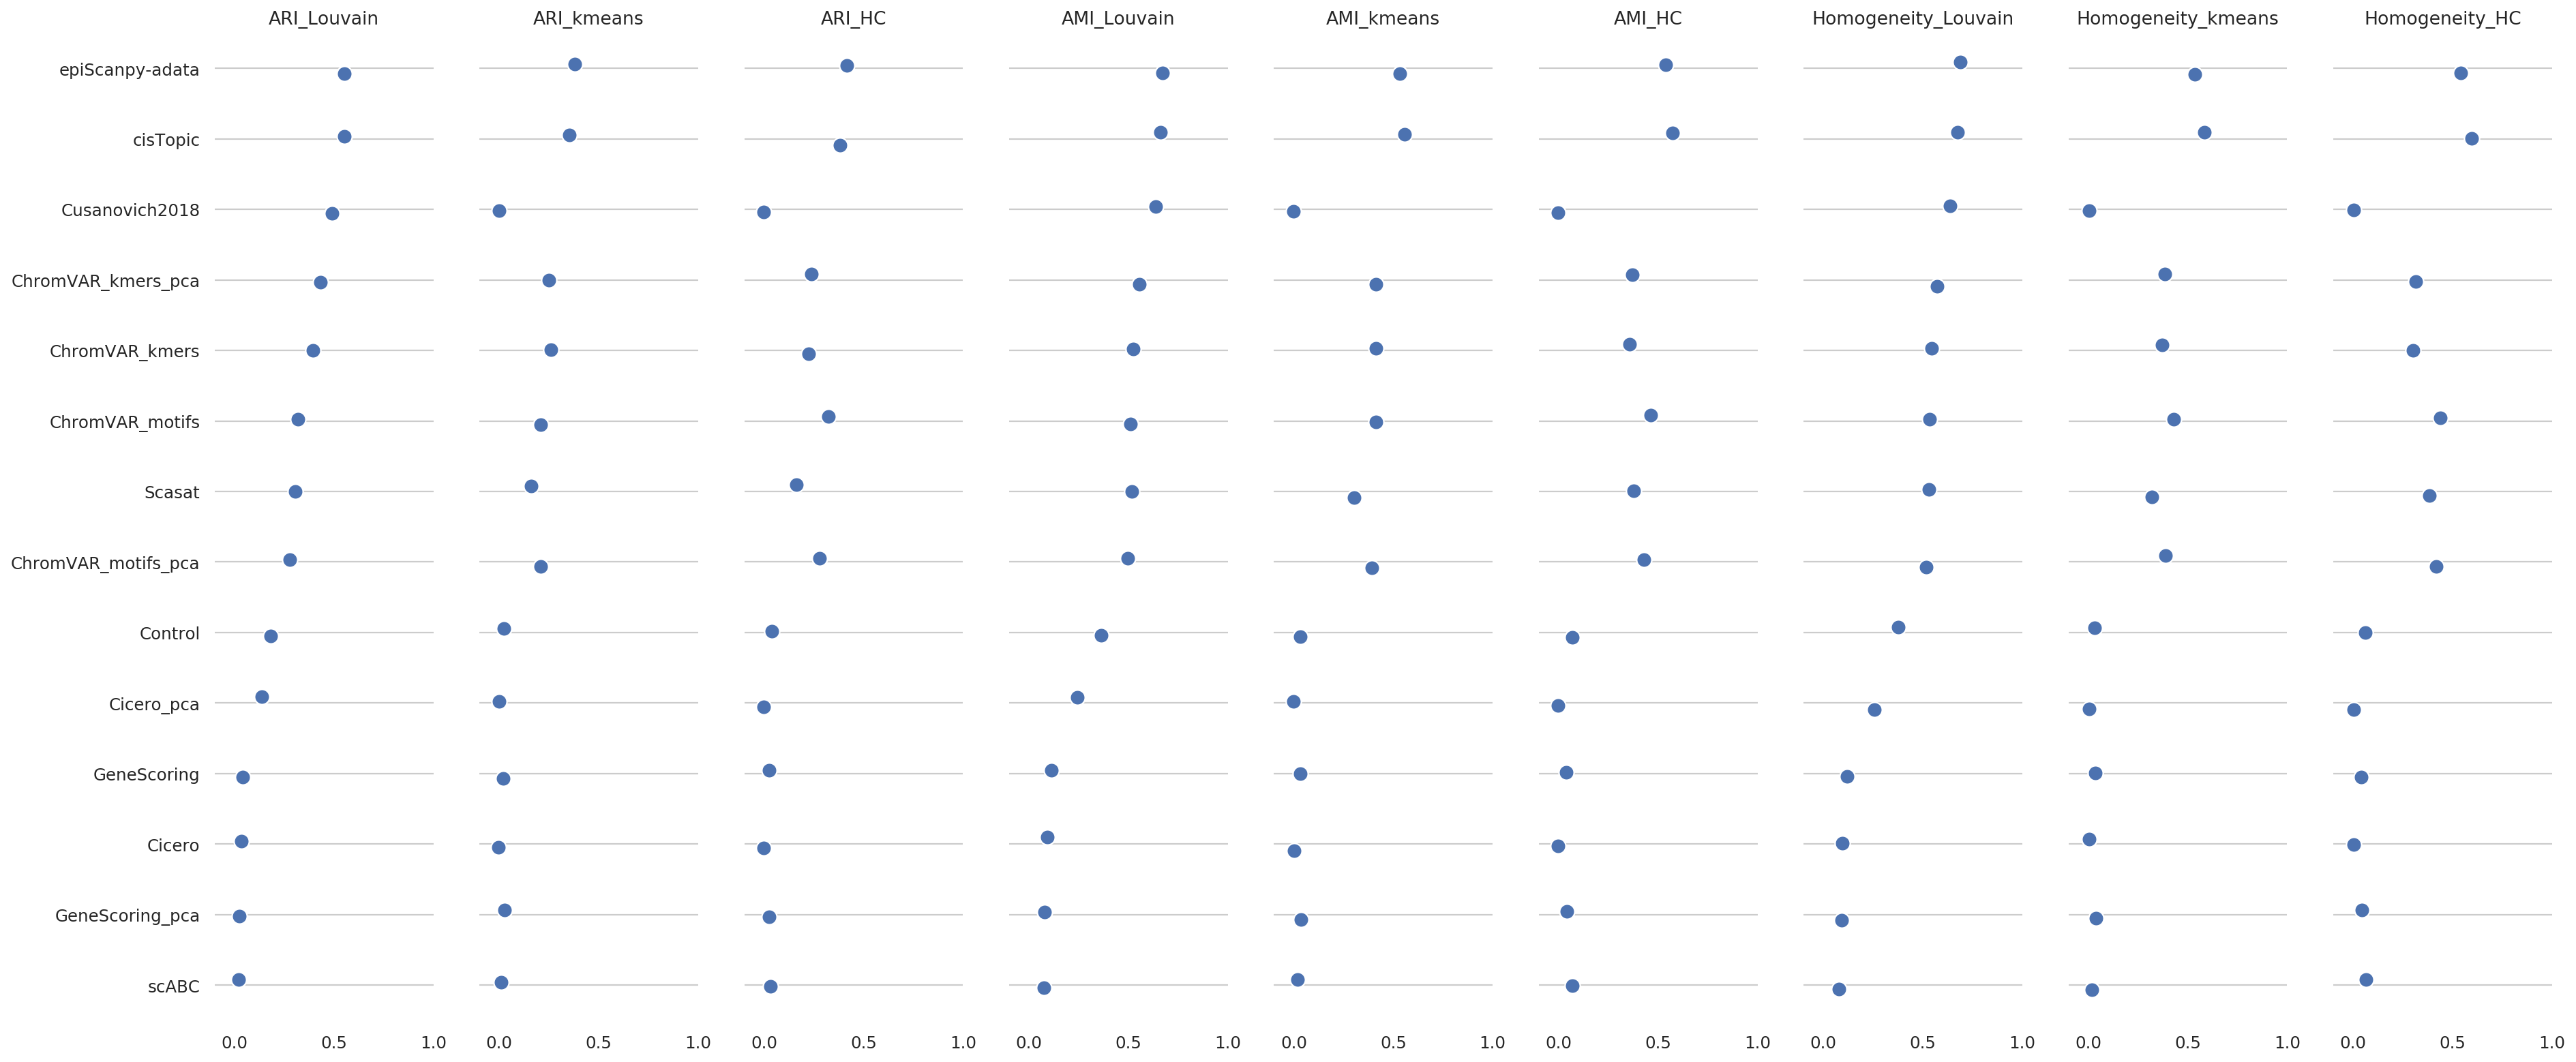

In [11]:
df_metrics = pd.DataFrame(columns=['ARI_Louvain','ARI_kmeans','ARI_HC',
                                   'AMI_Louvain','AMI_kmeans','AMI_HC',
                                   'Homogeneity_Louvain','Homogeneity_kmeans','Homogeneity_HC'])


# set method name
method = 'epiScanpy-adata'

# convert the cell label to standard label

# set the number of cluster for louvain
num_clusters = len(np.unique(adata.obs['label']))
#print(num_clusters)

# set the epiScanpy metric raw in the pandas dataframe
df_metrics.loc[method,] = ""

## get the clusters

#Louvain
#sc.pp.neighbors(adata, n_neighbors=15,use_rep='X') # I MUST NOT recalculate the neighboring graph like this
#sc.tl.louvain(adata)
getNClusters(adata,n_cluster=num_clusters)

#kmeans
#kmeans = KMeans(n_clusters=num_clusters, random_state=2019).fit(adata.X)
kmeans = KMeans(n_clusters=num_clusters, random_state=2019).fit(adata.obsm['X_pca'])
adata.obs['kmeans'] = pd.Series(kmeans.labels_,index=adata.obs.index).astype('category')

#hierachical clustering
#hc = AgglomerativeClustering(n_clusters=num_clusters).fit(adata.X)
hc = AgglomerativeClustering(n_clusters=num_clusters).fit(adata.obsm['X_pca'])
adata.obs['hc'] = pd.Series(hc.labels_,index=adata.obs.index).astype('category')

#adjusted rank index
ari_louvain = adjusted_rand_score(adata.obs['label'], adata.obs['louvain'])
ari_kmeans = adjusted_rand_score(adata.obs['label'], adata.obs['kmeans'])
ari_hc = adjusted_rand_score(adata.obs['label'], adata.obs['hc'])
#adjusted mutual information
ami_louvain = adjusted_mutual_info_score(adata.obs['label'], adata.obs['louvain'],average_method='arithmetic')
ami_kmeans = adjusted_mutual_info_score(adata.obs['label'], adata. obs['kmeans'],average_method='arithmetic')   
ami_hc = adjusted_mutual_info_score(adata.obs['label'], adata.obs['hc'],average_method='arithmetic')
#homogeneity
homo_louvain = homogeneity_score(adata.obs['label'], adata.obs['louvain'])
homo_kmeans = homogeneity_score(adata.obs['label'], adata.obs['kmeans'])
homo_hc = homogeneity_score(adata.obs['label'], adata.obs['hc'])

df_metrics.loc[method,['ARI_Louvain','ARI_kmeans','ARI_HC']] = [ari_louvain,ari_kmeans,ari_hc]
df_metrics.loc[method,['AMI_Louvain','AMI_kmeans','AMI_HC']] = [ami_louvain,ami_kmeans,ami_hc]
df_metrics.loc[method,['Homogeneity_Louvain','Homogeneity_kmeans','Homogeneity_HC']] = [homo_louvain,homo_kmeans,homo_hc] 
#adata.obs[['louvain','kmeans','hc']].to_csv(os.path.join(path_clusters ,method + '_clusters.tsv'),sep='\t')

sc.pl.umap(adata, color=['label', 'louvain', 'kmeans', 'hc'])

all_metrics = """ChromVAR_kmers	0.393487	0.260785	0.225031	0.524566	0.413008	0.356731	0.543092	0.370503	0.301594
ChromVAR_motifs	0.319824	0.209636	0.323051	0.510618	0.413654	0.464172	0.534893	0.429699	0.437689
cisTopic	0.551506	0.351849	0.383048	0.661205	0.555908	0.573953	0.674538	0.585062	0.59729
Cusanovich2018	0.490138	-0.00194164	-0.00194164	0.636935	-0.00278841	-0.00278841	0.635598	0.00302188	0.00302188
Control	0.183302	0.0229697	0.0397529	0.363688	0.0314137	0.0673721	0.377179	0.0328729	0.0616285
GeneScoring	0.0403609	0.0179964	0.0255461	0.111789	0.0318159	0.0369079	0.11883	0.0346644	0.0399724
Scasat	0.305007	0.161367	0.161388	0.517868	0.302171	0.378108	0.531279	0.320602	0.383529
scABC	0.020894	0.0109238	0.0327437	0.0737247	0.0190839	0.0682762	0.0780852	0.0196556	0.0635191
Cicero	0.033752	-0.00369183	-0.00194164	0.091265	0.0020334	-0.00278841	0.095604	0.00611831	0.00302188
ChromVAR_kmers_pca	0.431822	0.249719	0.238284	0.554208	0.413693	0.370762	0.57097	0.386348	0.313476
ChromVAR_motifs_pca	0.278085	0.20965	0.277897	0.496071	0.392932	0.429734	0.516014	0.387038	0.41759
GeneScoring_pca	0.0231933	0.0252487	0.0252567	0.0785274	0.0365736	0.0399461	0.0913253	0.0397867	0.0429546
Cicero_pca	0.139162	-0.00194164	-0.00194164	0.243913	-0.00278841	-0.00278841	0.255627	0.00302188	0.00302188
"""

all_metrics = [line.split('\t') for line in  all_metrics.split('\n')[:-1]]

for line in all_metrics:
    #print(line)
    df_metrics.loc[line[0],['ARI_Louvain','ARI_kmeans','ARI_HC']] = line[1:4]
    df_metrics.loc[line[0],['AMI_Louvain','AMI_kmeans','AMI_HC']] = line[4:7]
    df_metrics.loc[line[0],['Homogeneity_Louvain','Homogeneity_kmeans','Homogeneity_HC']] = line[7:]

#sc.pl.umap(adata, color=['label', 'louvain', 'kmeans', 'hc'])


for key in df_metrics.keys():
    df_metrics[key] = [float(key) for key in df_metrics[key]]
    
df_metrics['method'] = df_metrics.index.tolist()


sns.set(style="whitegrid")

# data to plot
df_metrics

# Make the PairGrid
g = sns.PairGrid(df_metrics.sort_values("ARI_Louvain", ascending=False),
                 x_vars=df_metrics.columns[:9], y_vars=["method"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      #palette="ch:s=1,r=-.1,h=1_r",
      linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.1, 1.), xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['ARI_Louvain', 'ARI_kmeans', 'ARI_HC',
          'AMI_Louvain', 'AMI_kmeans', 'AMI_HC',
          'Homogeneity_Louvain', 'Homogeneity_kmeans', 'Homogeneity_HC']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

df_metrics